In [2]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [3]:
%matplotlib inline

In [4]:
m = n = l = 4 # L of square grid

# J +-1

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


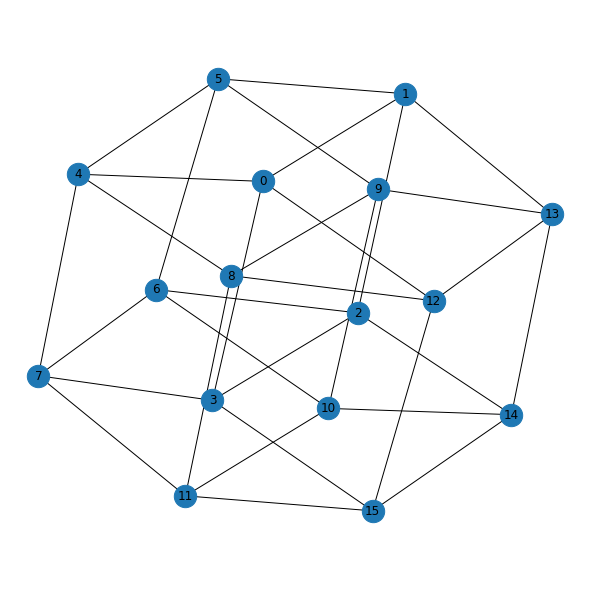

In [5]:
import graph_gen
import imp
imp.reload(graph_gen)
periodic = True
N, J_interaction = graph_gen.grid_2d_interaction(n,m, periodic=periodic)

#H = np.random.random(N)
H=np.zeros(N)

betas_fast = np.arange(1e-6,2.1,1e-1)

j = graph_gen.spin_glass_one()
J = graph_gen.set_J(J_interaction, j)
#J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [6]:
model_j1 = model.model(N, H, J, J_interaction)
res_ex_j1 = solvers.exact_sol(model_j1, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -2e-06 M: 0.0 S: 0.693777
beta: 0.1, Fe: -7.031 Energy: -0.199 M: 0.0 S: 0.683.12e+0222
beta: 0.2, Fe: -3.664 Energy: -0.394 M: 0.0 S: 0.6548.655
beta: 0.3, Fe: -2.605 Energy: -0.578 M: 0.0 S: 0.6081.760
beta: 0.4, Fe: -2.119 Energy: -0.743 M: 0.0 S: 0.5513.995
beta: 0.5, Fe: -1.858 Energy: -0.882 M: 1.08e-17 S: 0.488
beta: 0.6, Fe: -1.705 Energy: -0.993 M: 1.82e-17 S: 0.428
beta: 0.7, Fe: -1.610 Energy: -1.07 M: 1.53e-16 S: 0.3756
beta: 0.8, Fe: -1.547 Energy: -1.13 M: 1.73e-16 S: 0.3321
beta: 0.9, Fe: -1.503 Energy: -1.17 M: 2.02e-17 S: 0.2980
beta: 1.0, Fe: -1.471 Energy: -1.2 M: 2.04e-17 S: 0.27455
beta: 1.1, Fe: -1.447 Energy: -1.22 M: 1.19e-17 S: 0.2557
beta: 1.2, Fe: -1.428 Energy: -1.23 M: 8.25e-17 S: 0.2428
beta: 1.3, Fe: -1.413 Energy: -1.23 M: 2.76e-16 S: 0.2322
beta: 1.4, Fe: -1.401 Energy: -1.24 M: 2.32e-17 S: 0.2254
beta: 1.5, Fe: -1.390 Energy: -1.24 M: 2.68e-17 S: 0.2222
beta: 1.6, Fe: -1.381 Energy: -1.25 M: 1.59e-17 S: 0.2171
beta: 1

In [18]:
res_nn_j1 = solvers.nn_sol(model_j1, betas_fast, max_step=2000, 
                        bias = True, 
                        lr=0.01,
                        batch_size=10000,
                        z2 = False, x_hat_clip = False)
res_nn_j1["name"]="nn"

fe: -693147.200 std_fe: 2.24E+00 M: 0.009 S: 0.693 E: -0.005: 0.00696, B1 = -0.00000
fe: -7.031 std_fe: 3.02E-02 M: 0.008 S: 0.684 E: -0.196: 0.00511, B1 = -0.002
fe: -3.659 std_fe: 5.55E-02 M: 0.010 S: 0.658 E: -0.369: 0.00689, B1 = 0.0060
fe: -2.592 std_fe: 7.62E-02 M: 0.008 S: 0.618 E: -0.533: 0.00753, B1 = -0.002
fe: -2.091 std_fe: 9.11E-02 M: 0.007 S: 0.570 E: -0.666: 0.00734, B1 = 0.0060
fe: -1.820 std_fe: 9.77E-02 M: 0.005 S: 0.510 E: -0.800: 0.0105, B1 = 0.00521
fe: -1.661 std_fe: 9.89E-02 M: 0.005 S: 0.444 E: -0.922: 0.0132, B1 = -0.0254
fe: -1.564 std_fe: 9.37E-02 M: 0.007 S: 0.377 E: -1.026: 0.00581, B1 = -0.003
fe: -1.501 std_fe: 8.13E-02 M: 0.007 S: 0.312 E: -1.111: 0.0143, B1 = -0.0022
fe: -1.459 std_fe: 6.61E-02 M: 0.008 S: 0.266 E: -1.163: 0.00679, B1 = -0.007
fe: -1.432 std_fe: 5.71E-02 M: 0.012 S: 0.240 E: -1.192: 0.0194, B1 = -0.0243
fe: -1.410 std_fe: 5.07E-02 M: 0.007 S: 0.222 E: -1.209: 0.00624, B1 = 0.0021
fe: -1.394 std_fe: 4.65E-02 M: 0.006 S: 0.209 E: -1.220: 

In [9]:
imp.reload(solvers)
import bp_solver
imp.reload(bp_solver)
res_bp_j1 = solvers.bp_sol(model_j1, betas_fast, error=1e-4, )
res_bp_j1["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 2
fe: -7.031, ener: -0.199, M: 0.000, iter 5
fe: -3.664, ener: -0.395, M: 0.000, iter 7
fe: -2.606, ener: -0.583, M: 0.000, iter 11
fe: -2.123, ener: -0.760, M: 0.000, iter 15
fe: -1.867, ener: -0.924, M: 0.000, iter 25
fe: -1.722, ener: -1.074, M: 0.000, iter 73
fe: -1.671, ener: -1.244, M: 0.284, iter 1000
fe: -1.588, ener: -1.211, M: 0.420, iter 1000
fe: -1.538, ener: -1.268, M: 0.478, iter 1000
fe: -1.583, ener: -1.319, M: 0.427, iter 1000
fe: -1.500, ener: -1.226, M: 0.624, iter 1000
fe: -1.491, ener: -1.346, M: 0.641, iter 1000
fe: -1.367, ener: -1.340, M: 0.645, iter 1000
fe: -1.372, ener: -1.338, M: 0.664, iter 1000
fe: -1.568, ener: -1.371, M: 0.798, iter 1000
fe: -1.569, ener: -1.362, M: 0.802, iter 1000
fe: -1.572, ener: -1.354, M: 0.801, iter 1000
fe: -1.482, ener: -1.349, M: 0.768, iter 1000
fe: -1.465, ener: -1.343, M: 0.785, iter 1000
fe: -1.451, ener: -1.338, M: 0.797, iter 1000


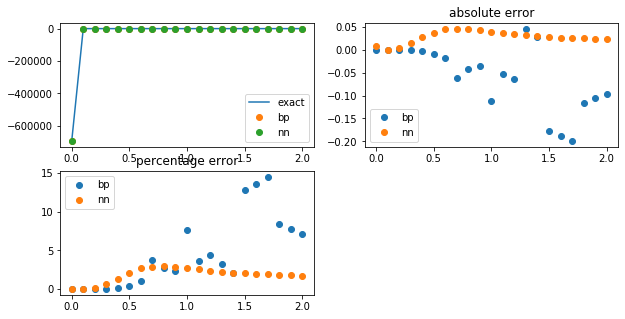

In [11]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1])
#plt.ylim(-0.01,0.01)
plt.show()

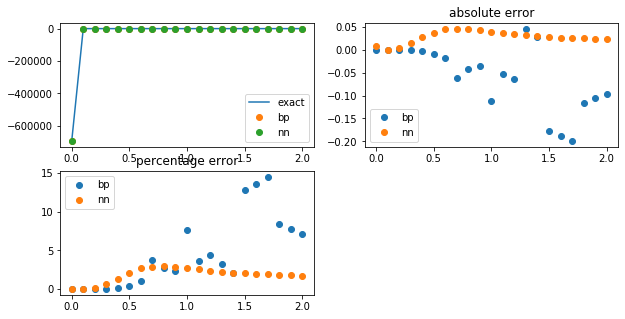

In [13]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1])
#plt.ylim(-0.01,0.01)
plt.show()

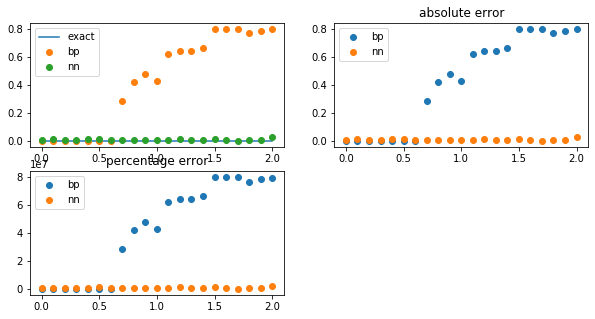

In [14]:
%matplotlib inline
label="M"
imp.reload(solvers)
plt= solvers.plot_quantity(label, res_ex_j1, [res_bp_j1, res_nn_j1])
#plt.ylim(-0.01,0.01)
plt.show()

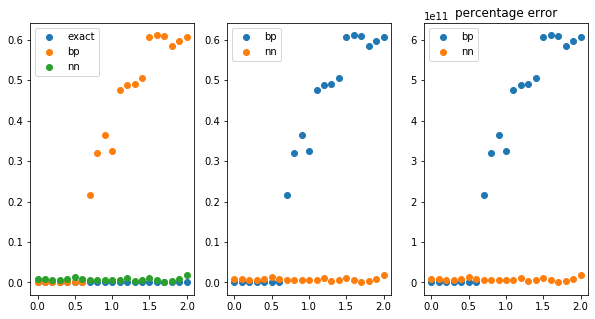

In [15]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex_j1, [res_bp_j1, res_nn_j1])
plt.legend()
plt.show()

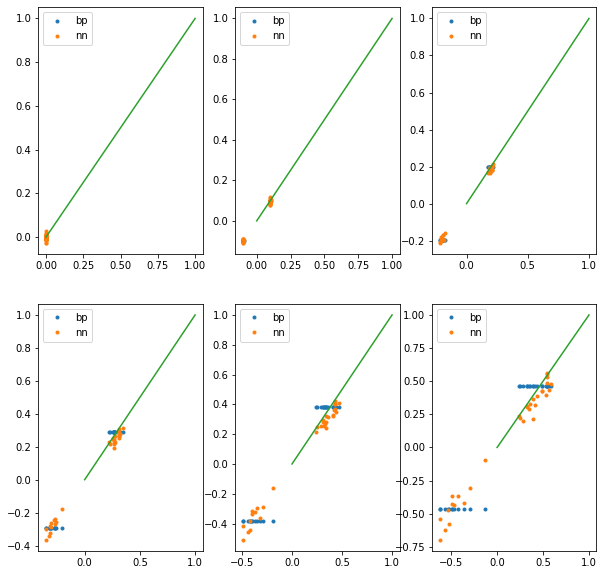

In [17]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas_fast[0:6], res_ex_j1, [res_bp_j1, res_nn_j1], J_interaction)
plt.show()